# 📊 Project: TA-125 Growth: Inflation, Price Hikes, or True Market Strength?

## 🧠 Behind the Project

### During 2024–2025, I noticed a lot of excitement around the Tel Aviv 125 index reaching new highs.  
### But as someone who studies both computer science and economics, I started to wonder —  
### are these highs truly a sign of economic strength, or simply a reflection of rising prices?

### This project began from that simple question:  
### ❝ Could inflation and cost of living increases be masking the true picture behind market growth? ❞

### To investigate this, I decided to analyze the TA-125 index alongside Israel's Consumer Price Index (CPI),  
### and compare that to the US market (S&P 500) and US CPI for perspective.

## 🎯 Goal:
## To explore whether the sharp rise in Israel's TA-125 stock index reflects true economic growth — or if it's primarily a result of rising living costs (inflation).

## 🧰 Data Sources:
### - TA-125 historical price data (from yfinance library)
### - Israeli Consumer Price Index (CPI) from CBS / OECD

## 📈 Key Steps:
### 1. Analyzed the growth of TA-125 during wartime in Israel.
### 2. Investigated whether the growth was due to inflation or actual performance.
### 3. Compared sector weights and focused on Tech vs. Finance.
### 4. Cross-checked patterns with the S&P 500 and sector returns.

## 🔄 Extension (Coming Next):
## We will expand this project to compare TA-125 and Israel's inflation to:
### - 🇺🇸 S&P 500 historical data (also from yfinance library)
### - 🇺🇸 U.S. CPI



## 👨‍💻 Tools Used:
### - Python (Pandas, Matplotlib, Seaborn)
### - Jupyter Notebook (Anaconda environment)

## Basic imports and data imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install yfinance

In [3]:
!pip install pandas_datareader

In [4]:
import yfinance as yf

In [5]:
ta125 = yf.download("^TA125.TA", start="2020-01-01", end="2025-07-16")
ta125.to_csv("ta125.csv")
ta125.head()

C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\342960060.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ta125 = yf.download("^TA125.TA", start="2020-01-01", end="2025-07-16")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^TA125.TA,^TA125.TA,^TA125.TA,^TA125.TA,^TA125.TA
Date,,,,,
2020-01-01,1623.709961,1624.280029,1619.650024,1619.729980,49772600
2020-01-02,1631.670044,1635.900024,1624.050049,1624.050049,145565900
2020-01-05,1624.609985,1626.040039,1621.229980,1624.530029,27934600
2020-01-06,1617.150024,1623.219971,1605.959961,1622.819946,62182300
2020-01-07,1616.489990,1622.010010,1612.560059,1620.939941,66628600


In [6]:
sp500 = yf.download("^GSPC", start="2020-01-01", end="2025-07-16")
sp500.to_csv("sp500.csv")
sp500.head()

C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\2430815731.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2020-01-01", end="2025-07-16")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000


In [7]:
import pandas_datareader.data as web

from datetime import datetime

start = datetime(2020, 1, 1)
end = datetime(2025, 7, 16)

us_cpi = web.DataReader("CPIAUCSL", "fred", start, end)
us_cpi.head()

,CPIAUCSL
DATE,
2020-01-01,259.127
2020-02-01,259.250
2020-03-01,258.076
2020-04-01,256.032
2020-05-01,255.802


In [8]:
from pandas_datareader import wb
israel_cpi = wb.download(indicator='FP.CPI.TOTL', country='IL', start=2020, end=2025)
israel_cpi.head()

C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\3601877398.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  israel_cpi = wb.download(indicator='FP.CPI.TOTL', country='IL', start=2020, end=2025)


FP.CPI.TOTL
country year             
Israel  2024   122.404993
        2023   118.773947
        2022   113.980151
        2021   109.165956
        2020   107.520653

# Data Anazlyze of TA125 + The Israeli CPI:


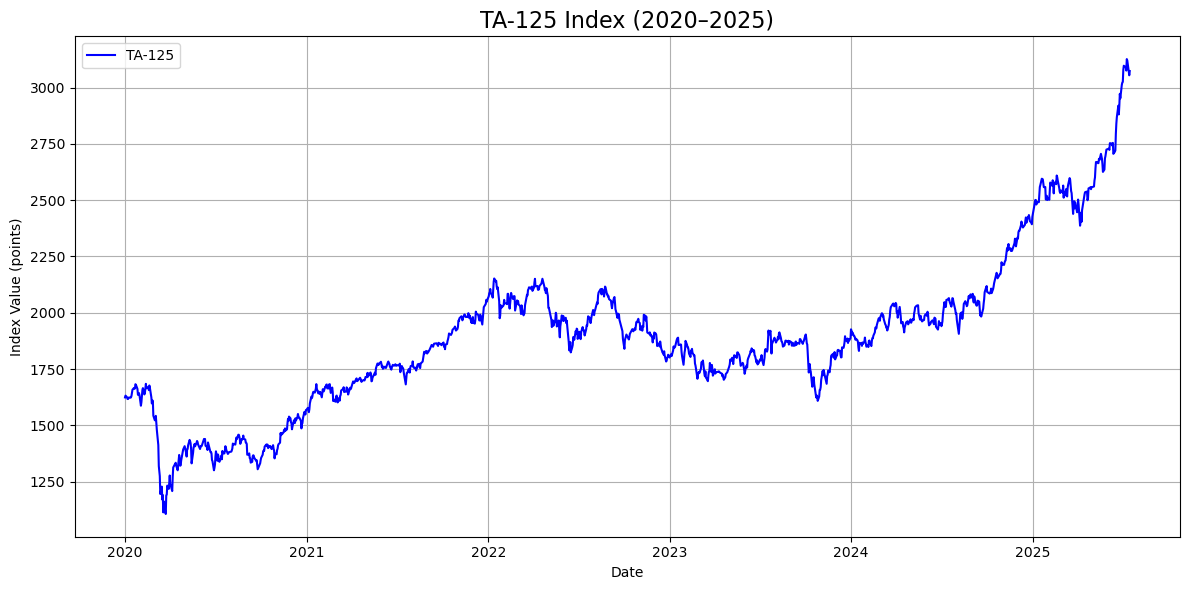

In [9]:
plt.figure(figsize=(12,6))
plt.plot(ta125.index, ta125['Close'], label='TA-125', color='blue')


plt.title('TA-125 Index (2020–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Index Value (points)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### The graph clearly shows that the TA125 index has been growing—especially between 2024 and 2025, during a time when Israel has been at war.


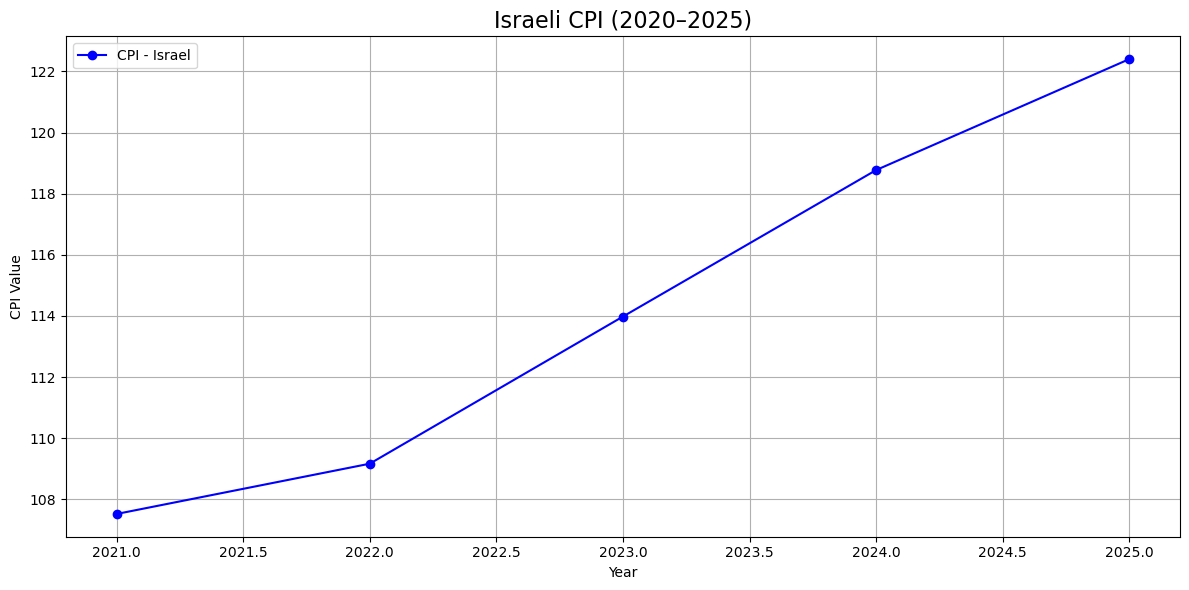

In [10]:
israel_cpi['year'] = [2025, 2024, 2023, 2022, 2021]

plt.figure(figsize=(12,6))
plt.plot(israel_cpi['year'], israel_cpi['FP.CPI.TOTL'], marker='o', label='CPI - Israel', color='blue')

plt.title('Israeli CPI (2020–2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




### The graph shows that Israel’s Consumer Price Index (CPI) is on the rise.  
### At first glance, this might suggest that my original theory was incorrect- that the TA125 is increasing mainly due to inflation.  
### But let’s take a closer look:


### This is TA125 Securities Classification by index components weight (actual precentage of each sector):


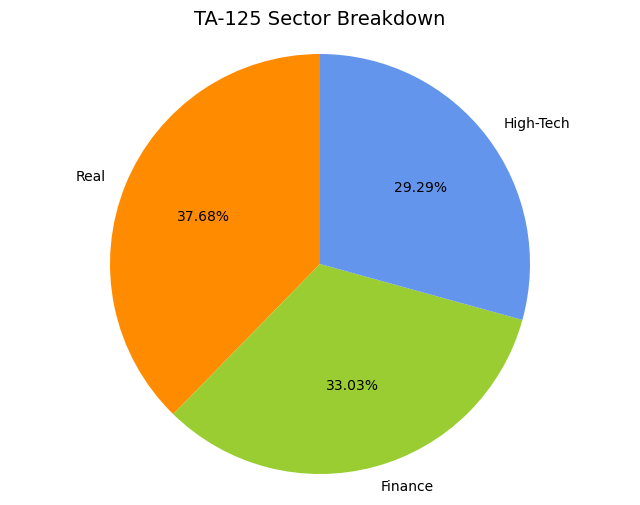

In [11]:
sectors = ['Real', 'Finance', 'High-Tech']
percentages = [37.68, 33.03, 29.29]
colors = ['darkorange', 'yellowgreen', 'cornflowerblue']

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=sectors, autopct='%1.2f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('TA-125 Sector Breakdown', fontsize=14)
plt.show()

### We can clearly see that the Real Estate and Finance sectors each make up around a third or more of the TA125 index, which is quite surprising.  
### You would expect that in a high-tech-driven country like Israel, the High-Tech sector would hold a much larger share compared to Real Estate or Finance.



### Looking at the sector breakdown, Real Estate and Finance lead the index—industries that can gain from price increases. This could explain why the index keeps rising even when the cost of living remains a major concern.

### Let's take 5 major players from the High-tech sector and the Real sector to see how they did (on average):

In [12]:
tech_stocks = ['NICE.TA', 'CHKP.TA', 'NVMI.TA', 'CAMT.TA', 'RADA.TA']
finance_stocks = ['LUMI.TA', 'POLI.TA', 'DSCT.TA', 'MZTF.TA', 'CLIS.TA']

In [13]:
import yfinance as yf

def get_sector_performance(tickers, start="2020-01-01", end="2025-07-01"):
    returns = []
    for ticker in tickers:
        df = yf.download(ticker, start=start, end=end, progress=False)
        if not df.empty:
            try:
                start_price = df['Close', ticker].iloc[0]
                end_price = df['Close', ticker].iloc[-1]
            except KeyError:
                
                start_price = df['Close'].iloc[0]
                end_price = df['Close'].iloc[-1]
            change = (end_price - start_price) / start_price * 100
            returns.append(change)
    return sum(returns) / len(returns) if returns else None



In [14]:
tech_avg = get_sector_performance(tech_stocks)
finance_avg = get_sector_performance(finance_stocks)


print("Tech sector avg return:", round(tech_avg, 2), "%")
print("Finance sector avg return:", round(finance_avg, 2), "%")

C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\2570186292.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\2570186292.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
HTTP Error 404: 

1 Failed download:
['CHKP.TA']: YFTzMissingError('possibly delisted; no timezone found')
C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\2570186292.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\2570186292.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\257

Tech sector avg return: 428.29 %
Finance sector avg return: 143.19 %


### We can see that the Tech sector significantly outperformed the Finance sector, which may indicate that my original theory was incorrect. Despite the challenging times of war, the TA-125 index appears to have performed remarkably well.

### Now we shall advance to the comparission with S&P500 and USA's CPI:

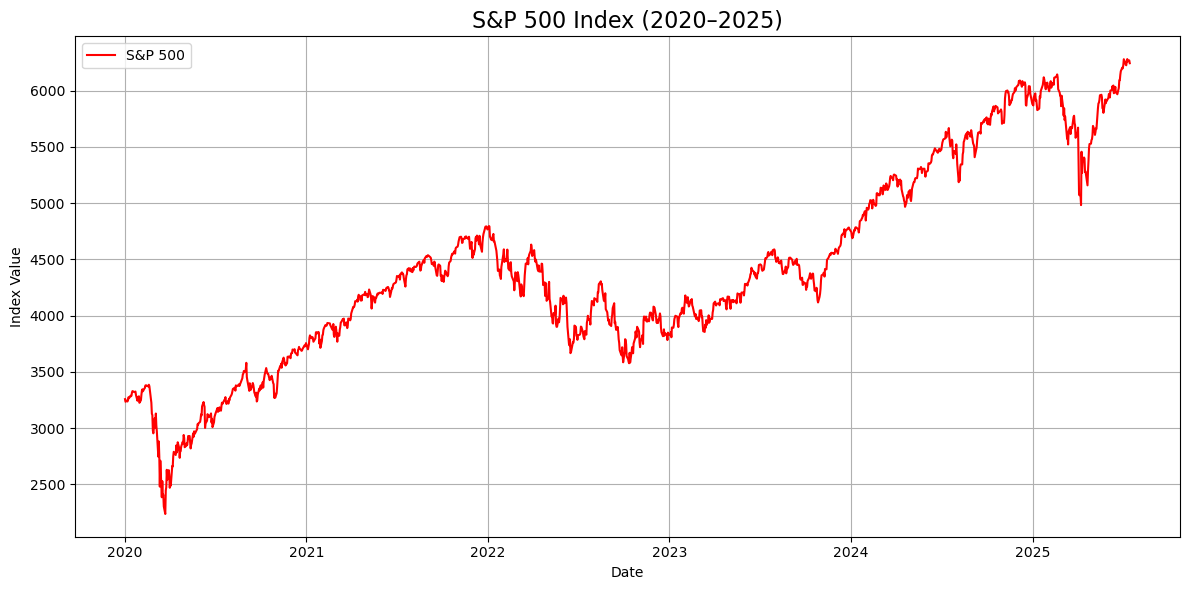

In [15]:
plt.figure(figsize=(12,6))
plt.plot(sp500.index, sp500['Close'], label='S&P 500', color='red')

plt.title('S&P 500 Index (2020–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### The graph shows that the S&P 500 also experienced growth, with a pattern that closely resembles the TA125.


C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\337486916.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  us_cpi = wb.download(indicator='FP.CPI.TOTL', country='US', start=2020, end=2024)


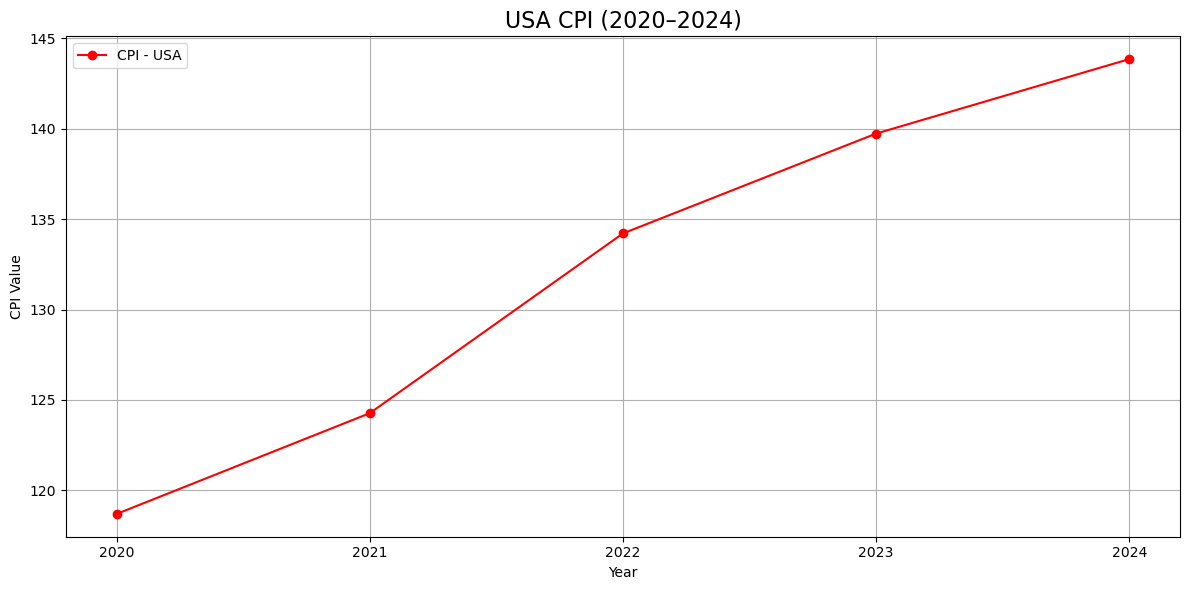

In [16]:
years = [2020, 2021, 2022, 2023,2024]

us_cpi = wb.download(indicator='FP.CPI.TOTL', country='US', start=2020, end=2024)

us_cpi = us_cpi.reset_index().sort_values('year')

plt.figure(figsize=(12,6))
plt.plot(us_cpi['year'], us_cpi['FP.CPI.TOTL'], marker='o', color='red', label='CPI - USA')

plt.title('USA CPI (2020–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### USA's CPI also grew. We might get similalr results after all.

### Let's break down the sectors of the S&P500:

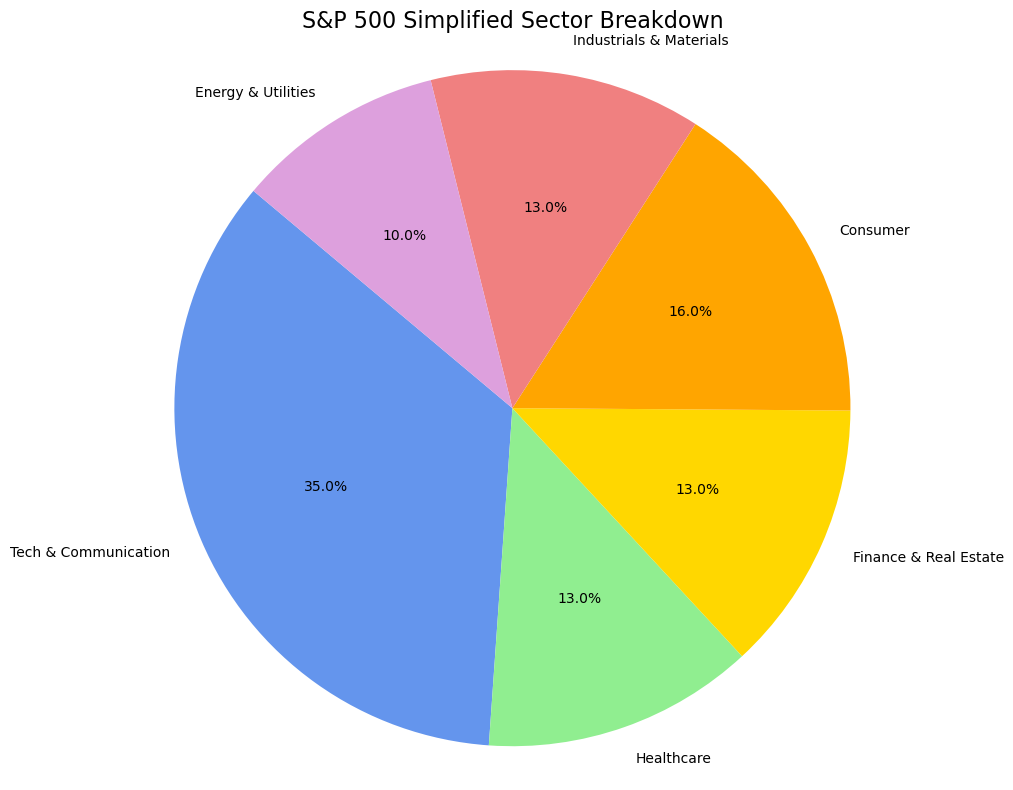

In [17]:
import matplotlib.pyplot as plt


sectors = ['Tech & Communication', 'Healthcare', 'Finance & Real Estate', 
           'Consumer', 'Industrials & Materials', 'Energy & Utilities']


percentages = [35, 13, 13, 16, 13, 10]


colors = ['cornflowerblue', 'lightgreen', 'gold', 'orange', 'lightcoral', 'plum']


plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=sectors, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('S&P 500 Simplified Sector Breakdown', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


### Although the S&P 500 is a much larger index, containing 500 stocks compared to just 125 in the TA125- we can still see that the Tech sector makes up about a third of the index.

### Let’s once again take 5 major stocks from the Tech sector and another 5 from the Finance sector, and compare their performance.


import yfinance as yf

def get_sector_performance(tickers, start="2020-01-01", end="2025-07-01"):
    returns = []
    for ticker in tickers:
        df = yf.download(ticker, start=start, end=end, progress=False)
        if not df.empty:
            try:
                start_price = df['Close', ticker].iloc[0]
                end_price = df['Close', ticker].iloc[-1]
            except KeyError:
                
                start_price = df['Close'].iloc[0]
                end_price = df['Close'].iloc[-1]
            change = (end_price - start_price) / start_price * 100
            returns.append(change)
    return sum(returns) / len(returns) if returns else None

In [19]:
tech_stocks_us = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META']
finance_stocks_us = ['JPM', 'BAC', 'WFC', 'GS', 'MS']


tech_avg = get_sector_performance(tech_stocks_us)
finance_avg = get_sector_performance(finance_stocks_us)

print("Tech sector avg return:", round(tech_avg, 2), "%")
print("Finance sector avg return:", round(finance_avg, 2), "%")

C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\3431126840.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\3431126840.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\3431126840.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\3431126840.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
C:\Users\ronko\AppData\Local\Temp\ipykernel_21496\3431126840.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.downl

Tech sector avg return: 673.2 %
Finance sector avg return: 146.39 %


### Once again, we see a clear pattern: in the S&P 500, the Tech sector significantly outperformed the Finance sector, just like we observed in the TA125. This consistency across both indices highlights the strong performance of the Tech industry during this period.



# Project Summary 📊
### At the start of this project, I believed that the recent rise in the TA-125 index wasn’t due to real economic growth, I thought it was just a result of inflation and increasing prices. My theory was that the market only appeared strong because the cost of living was rising.

### Later on, I realized that the CPI graph I created had a serious mistake. The dates and values were mismatched, which made it look like prices were going down, when in fact they were going up. This error caused confusion and delayed my progress, but it taught me an important lesson: always double-check your data and visuals before drawing conclusions.

### Once I fixed the graph and continued analyzing, I was surprised to discover that the tech sector in the TA-125 had performed much better than the finance sector, with an average return of over 400%. This result is quite similar to the S&P 500, where tech companies also lead the growth. So, my original assumption turned out to be wrong — the rise in TA-125 wasn’t just about inflation, but also reflected real strength in certain industries, especially technology.

### Even more impressive is the fact that TA-125 showed legitimate growth during a period of war and uncertainty. This highlights the resilience and potential of the Israeli market, particularly in the tech sector, even in difficult times.🚀

### In the end, this project (whihc is my first ever data-realated project) taught me a lot, not only about financial data and sector performance, but also about being careful with data interpretation and being open to adjusting my views based on what the evidence shows.

